In [10]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
def identify(image_path):
    
    frame = cv2.imread(image_path)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for i, ( x, y, w, h) in enumerate(faces):
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color

In [12]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [13]:
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [14]:
img_dirs

['./dataset/cropped',
 './dataset/Donald Trump',
 './dataset/Kane Williamson',
 './dataset/Kobe Bryant',
 './dataset/Maria Sharapova',
 './dataset/Narendra Modi',
 './dataset/Ronaldo',
 './dataset/Virat Kohli']

In [15]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [16]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = identify(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
Donald Trump
Generating cropped images in folder:  ./dataset/cropped/Donald Trump
Kane Williamson
Generating cropped images in folder:  ./dataset/cropped/Kane Williamson
Kobe Bryant
Generating cropped images in folder:  ./dataset/cropped/Kobe Bryant
Maria Sharapova
Generating cropped images in folder:  ./dataset/cropped/Maria Sharapova
Narendra Modi
Generating cropped images in folder:  ./dataset/cropped/Narendra Modi
Ronaldo
Generating cropped images in folder:  ./dataset/cropped/Ronaldo
Virat Kohli
Generating cropped images in folder:  ./dataset/cropped/Virat Kohli


In [32]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [26]:
# Cleaning the files which are deleted 
# manually but happens to be in the dictionary.

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split("/")[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
    
celebrity_file_names_dict

{'Donald Trump': ['./dataset/cropped/Donald Trump\\Donald Trump1.png',
  './dataset/cropped/Donald Trump\\Donald Trump2.png'],
 'Kane Williamson': ['./dataset/cropped/Kane Williamson\\Kane Williamson10.png',
  './dataset/cropped/Kane Williamson\\Kane Williamson2.png',
  './dataset/cropped/Kane Williamson\\Kane Williamson3.png',
  './dataset/cropped/Kane Williamson\\Kane Williamson4.png',
  './dataset/cropped/Kane Williamson\\Kane Williamson7.png',
  './dataset/cropped/Kane Williamson\\Kane Williamson8.png'],
 'Kobe Bryant': ['./dataset/cropped/Kobe Bryant\\Kobe Bryant1.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant10.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant12.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant14.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant16.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant17.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant3.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bryant5.png',
  './dataset/cropped/Kobe Bryant\\Kobe Bry

In [29]:
class_dict = {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'Donald Trump': 0,
 'Kane Williamson': 1,
 'Kobe Bryant': 2,
 'Maria Sharapova': 3,
 'Narendra Modi': 4,
 'Ronaldo': 5,
 'Virat Kohli': 6}

In [34]:
x, y = [], []
for celebrity_name, training_images in celebrity_file_names_dict.items():
    for training_image in training_images:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [41]:
len(x[0])
x

array([[ 56.,  88., 107., ..., 235.,  84.,   0.],
       [ 75., 119., 171., ..., 189., 127.,  14.],
       [178., 178., 178., ...,  75., 150., 120.],
       ...,
       [116., 136., 221., ...,   1., 253., 252.],
       [ 46.,  44.,  46., ...,   3.,   0.,   1.],
       [196., 206., 216., ...,  15.,  13.,  14.]])

In [38]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(77, 4096)

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0 ) 

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.65

In [47]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         4
           4       0.00      0.00      0.00         2
           5       0.59      1.00      0.74        10
           6       0.00      0.00      0.00         2

    accuracy                           0.65        20
   macro avg       0.52      0.40      0.41        20
weighted avg       0.59      0.65      0.57        20



C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [48]:
from sklearn import svm

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [51]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [55]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo, 
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.627273,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.559091,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.666667,{'logisticregression__C': 5}


In [56]:
best_estimators['svm'].score(x_test, y_test)

0.75

In [57]:
best_estimators['random_forest'].score(x_test, y_test)

0.45

In [58]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.6

In [59]:
best_clf = best_estimators['svm']

In [60]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 1, 0, 9, 0],
       [0, 1, 0, 0, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

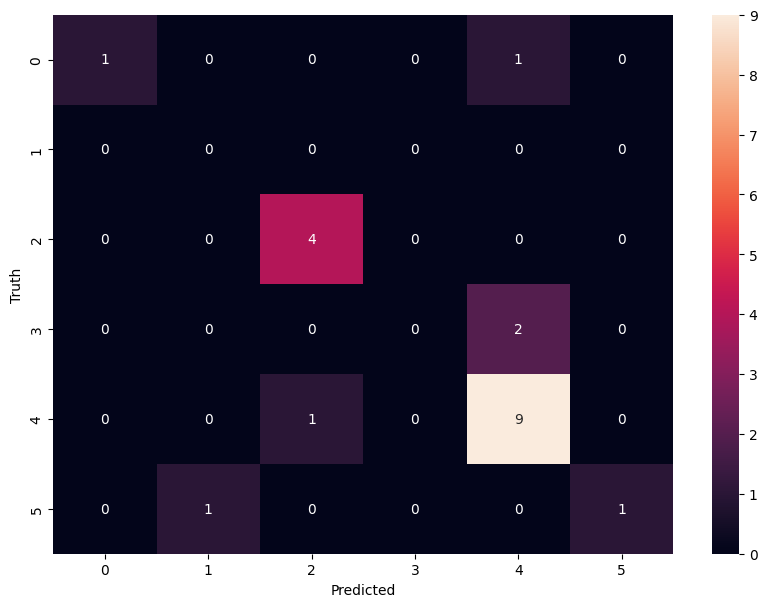

In [62]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
class_dict

{'Donald Trump': 0,
 'Kane Williamson': 1,
 'Kobe Bryant': 2,
 'Maria Sharapova': 3,
 'Narendra Modi': 4,
 'Ronaldo': 5,
 'Virat Kohli': 6}

In [65]:
import joblib

#saving the model as a pickle file
joblib.dump(best_clf, 'final_model.pkl')

['final_model.pkl']

In [66]:
import json 
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class))

SyntaxError: incomplete input (2872666492.py, line 2)